In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=np.load("/content/olivetti_faces (1).npy")
target=np.load("/content/olivetti_faces_target (1).npy")

In [ ]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

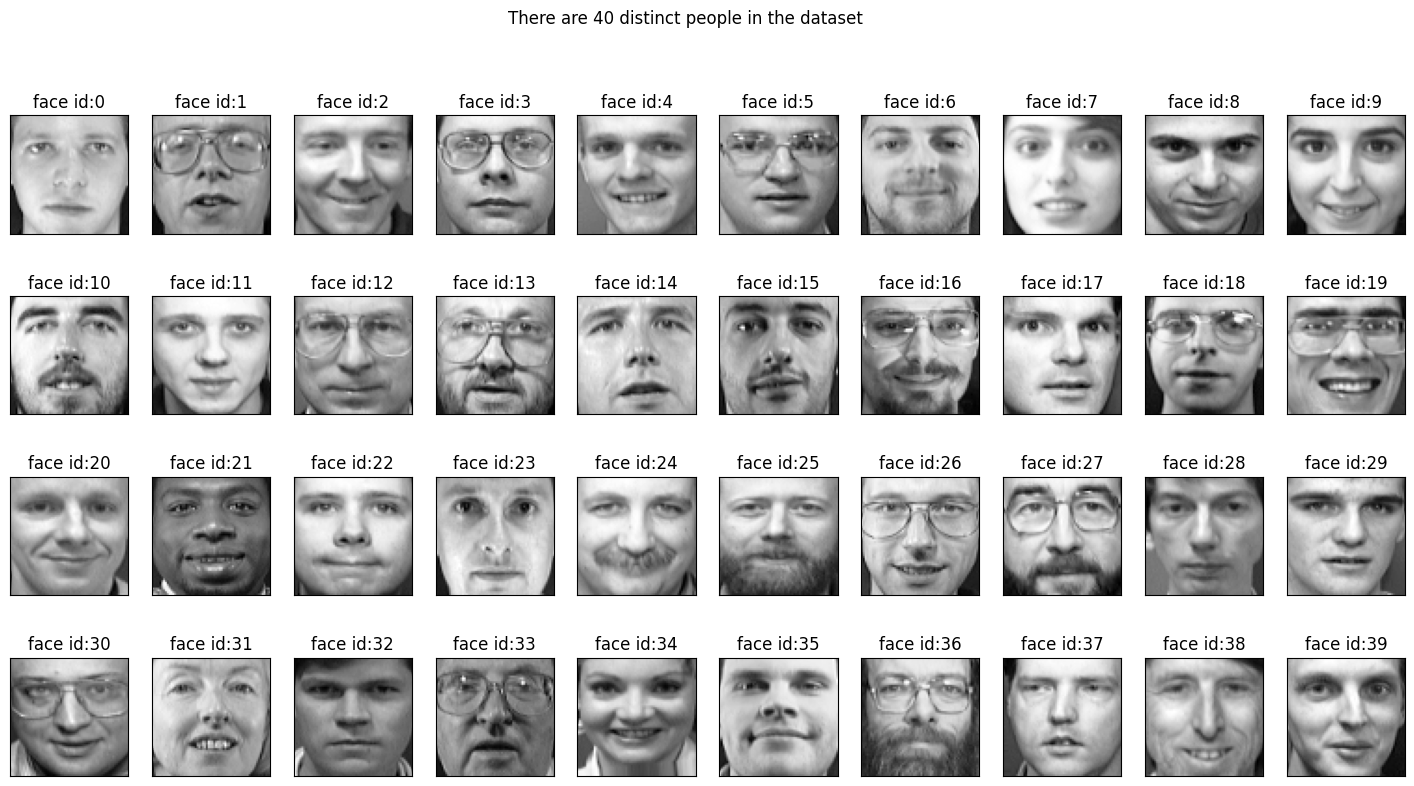

In [ ]:
show_40_distinct_people(data, np.unique(target))

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")


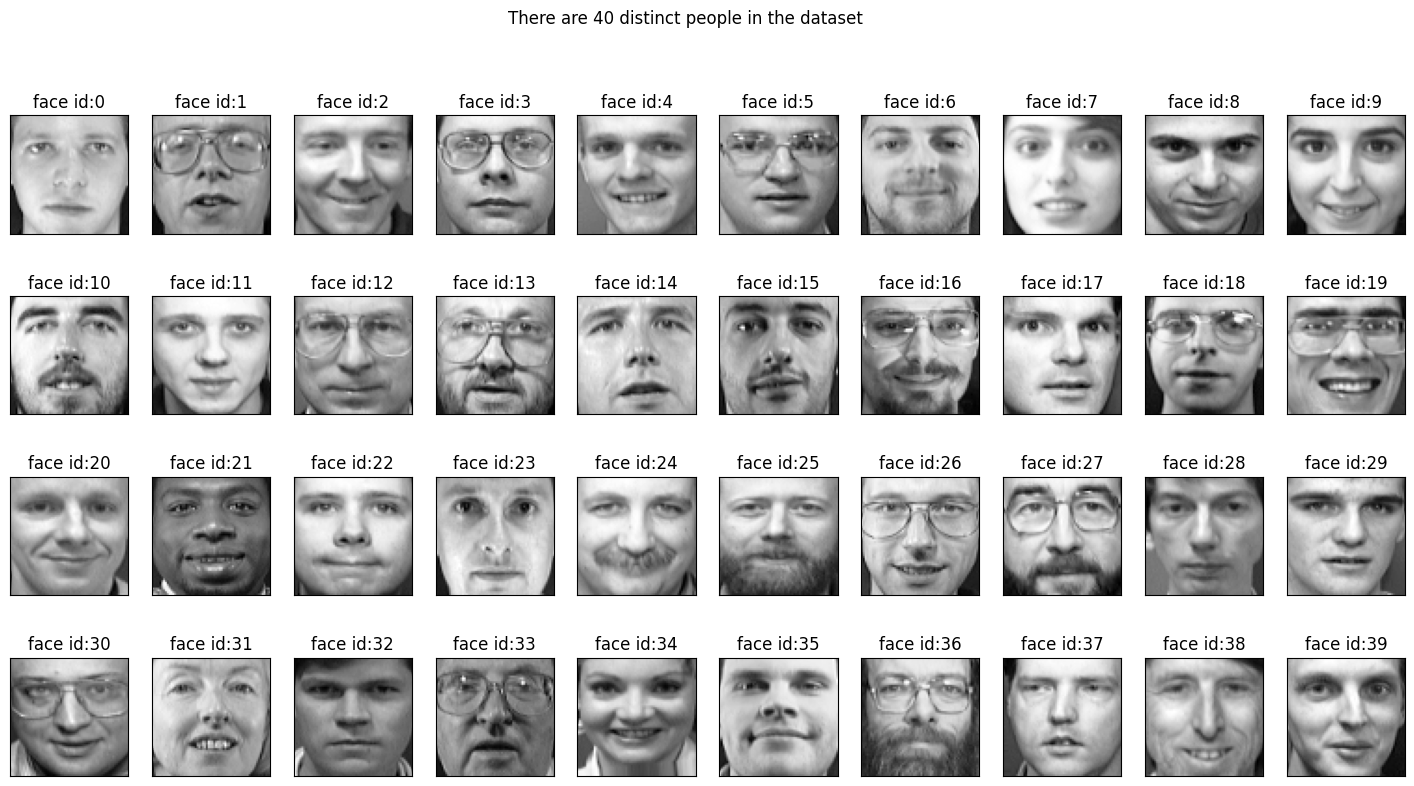

In [ ]:
show_40_distinct_people(data, np.unique(target))

In [ ]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)

    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))


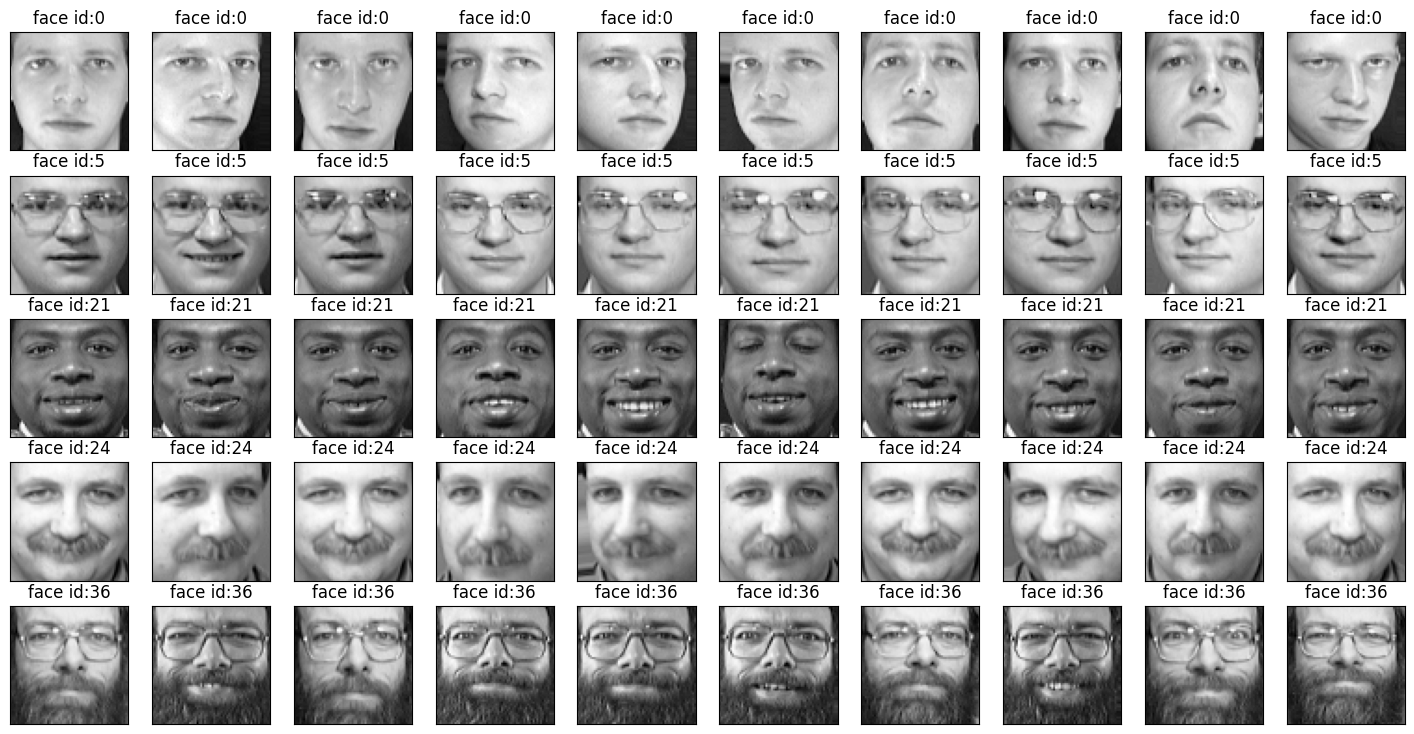

In [ ]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [ ]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

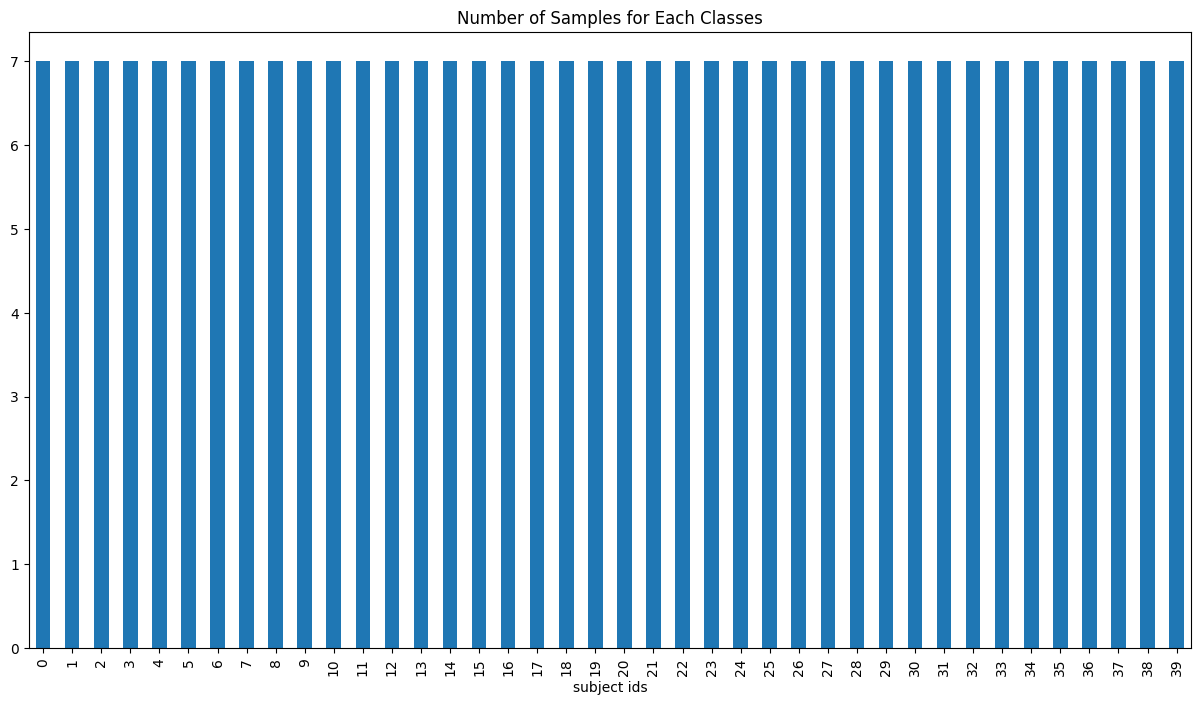

In [ ]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [ ]:
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.8 MB/s eta 0:00:00


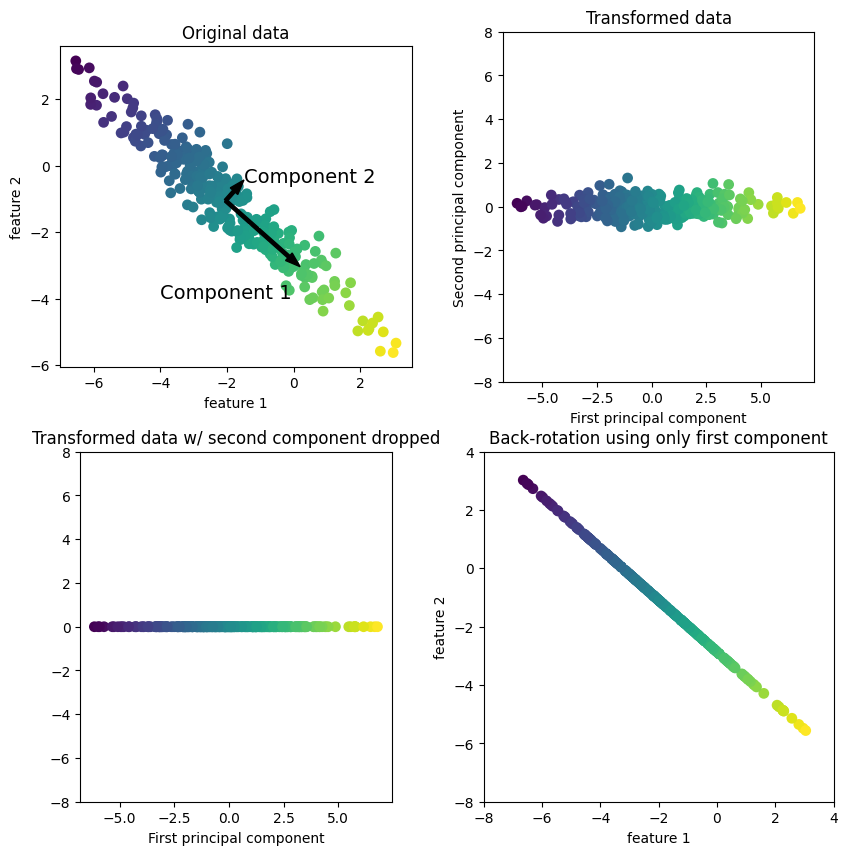

In [ ]:
mglearn.plots.plot_pca_illustration()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

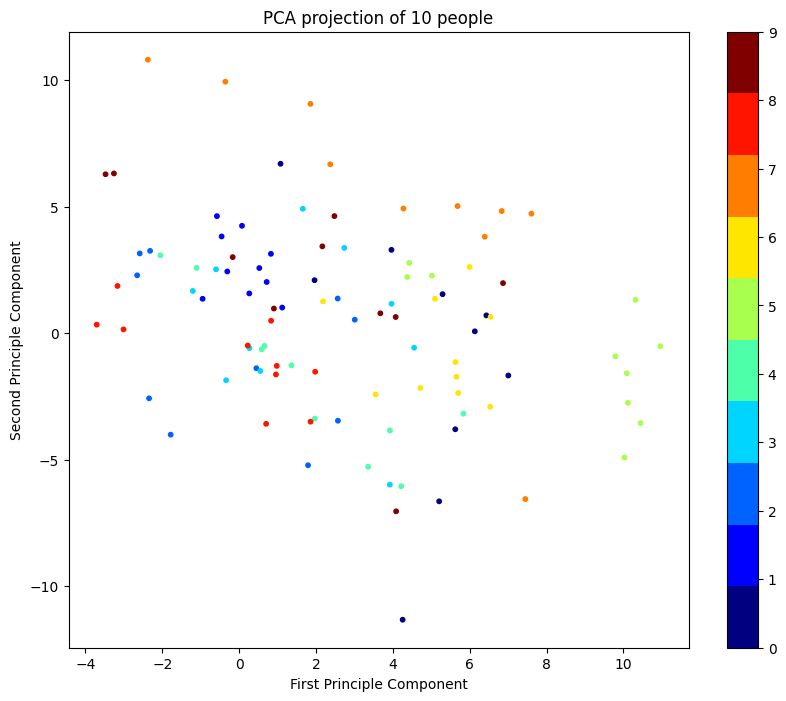

In [ ]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1],
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

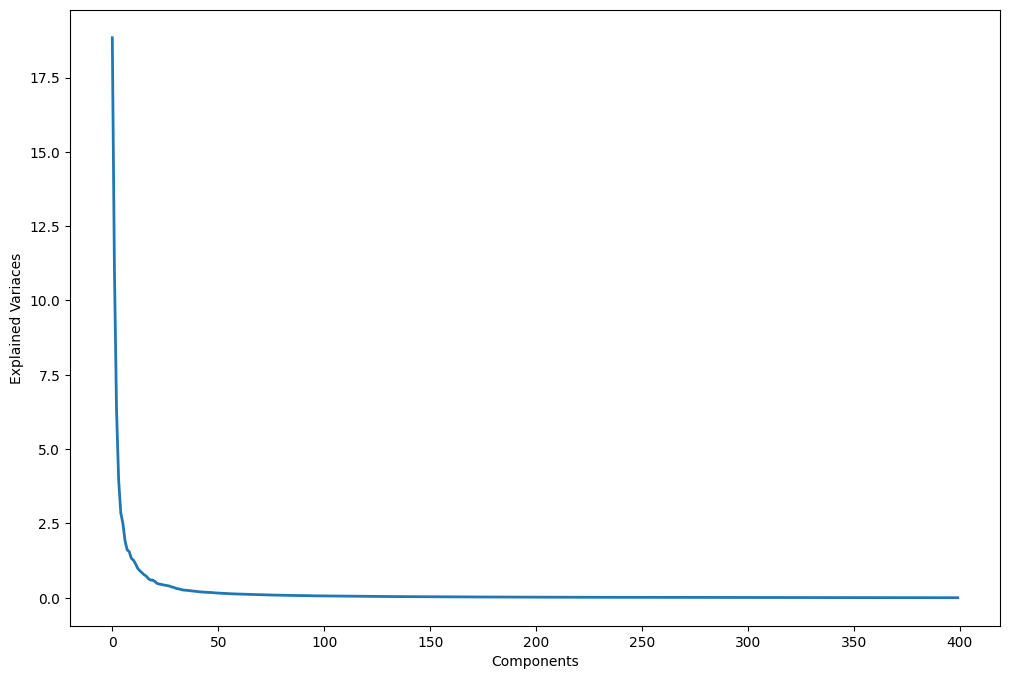

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
n_components=90

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)


PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

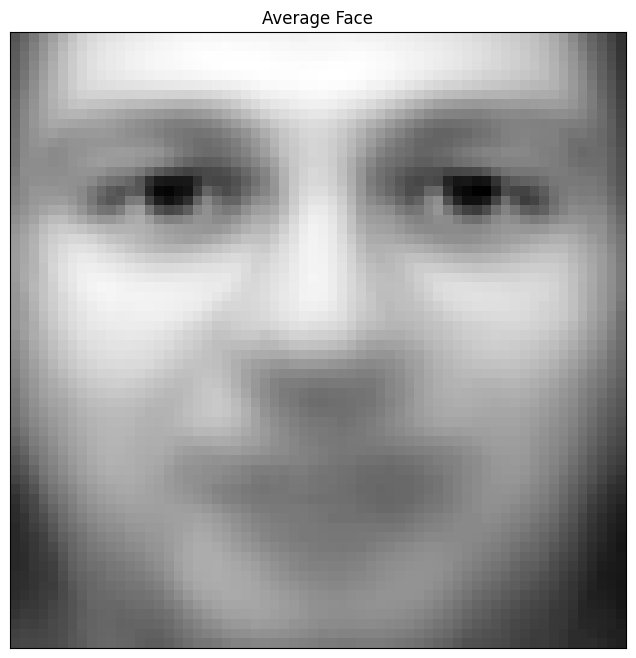

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

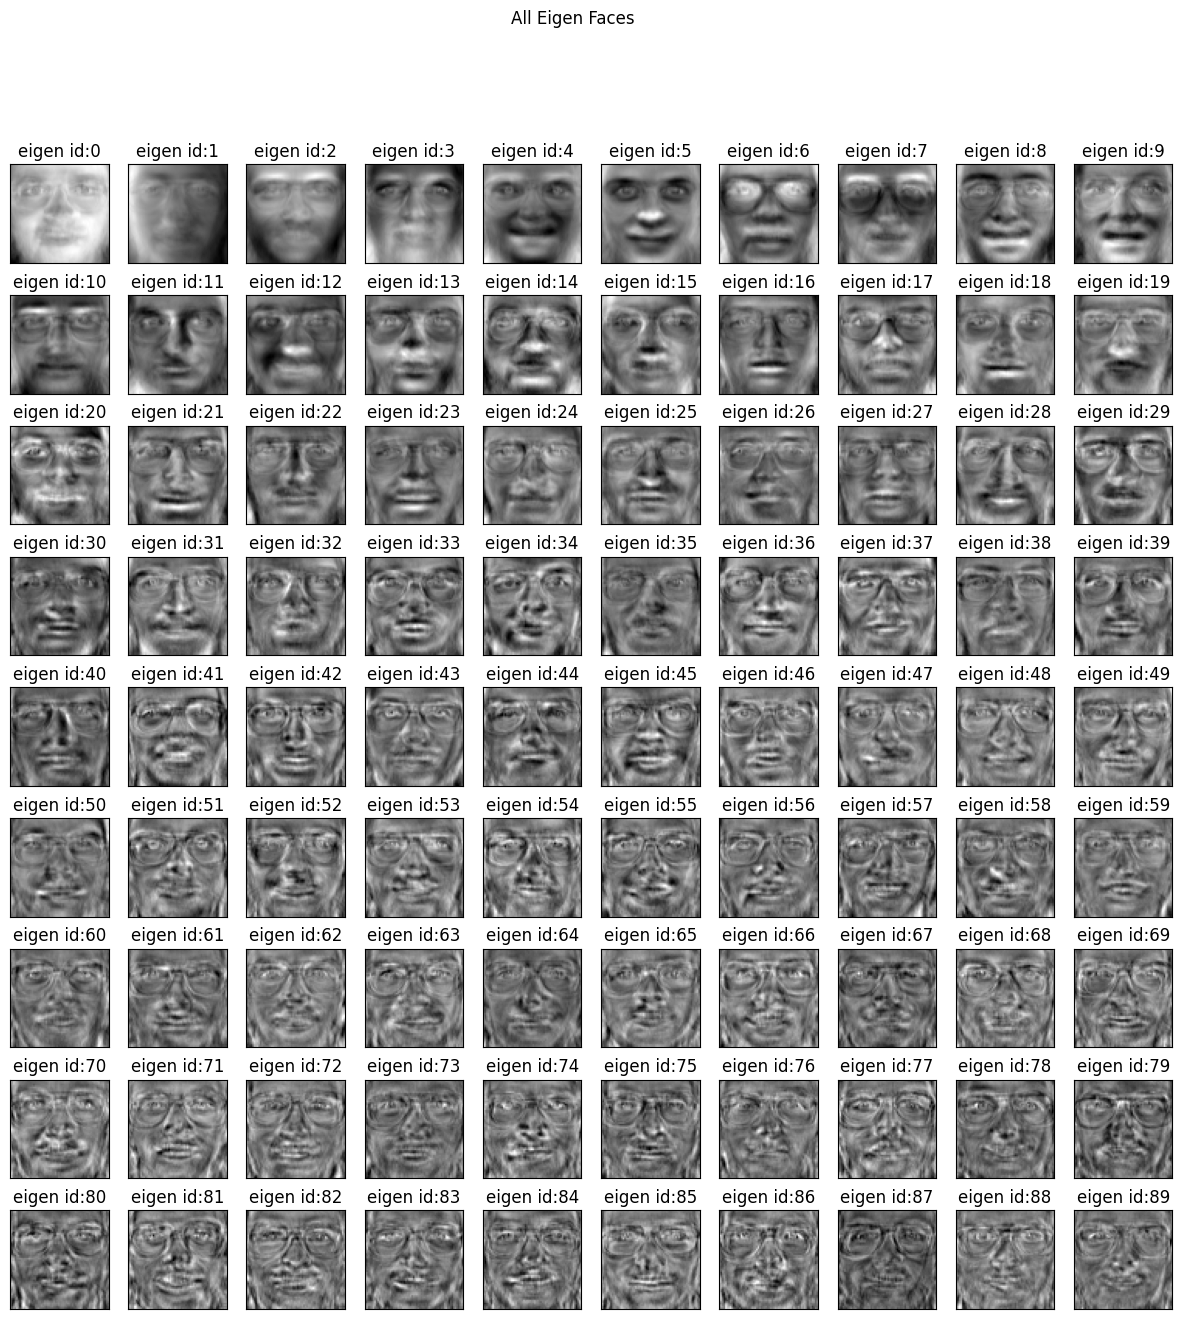

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred)))

accuracy score:0.92


<Axes: >

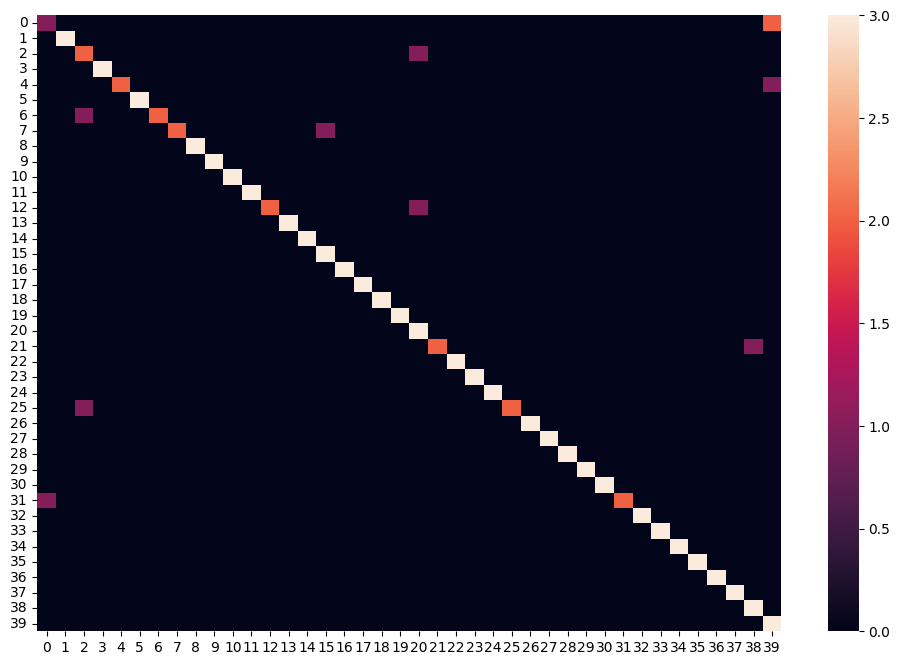

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics # Import the metrics module

plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

models=[]
models.append(('LDA', LinearDiscriminantAnalysis())) # Now LinearDiscriminantAnalysis is accessible
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:

    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.88

========== KNN RESULT ==========
Accuracy score:0.70

========== DT RESULT ==========
Accuracy score:0.61

========== SVM RESULT ==========
Accuracy score:0.92



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.93
NB mean cross validations score:0.78
KNN mean cross validations score:0.69
DT mean cross validations score:0.49
SVM mean cross validations score:0.87


In [ ]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


<Axes: >

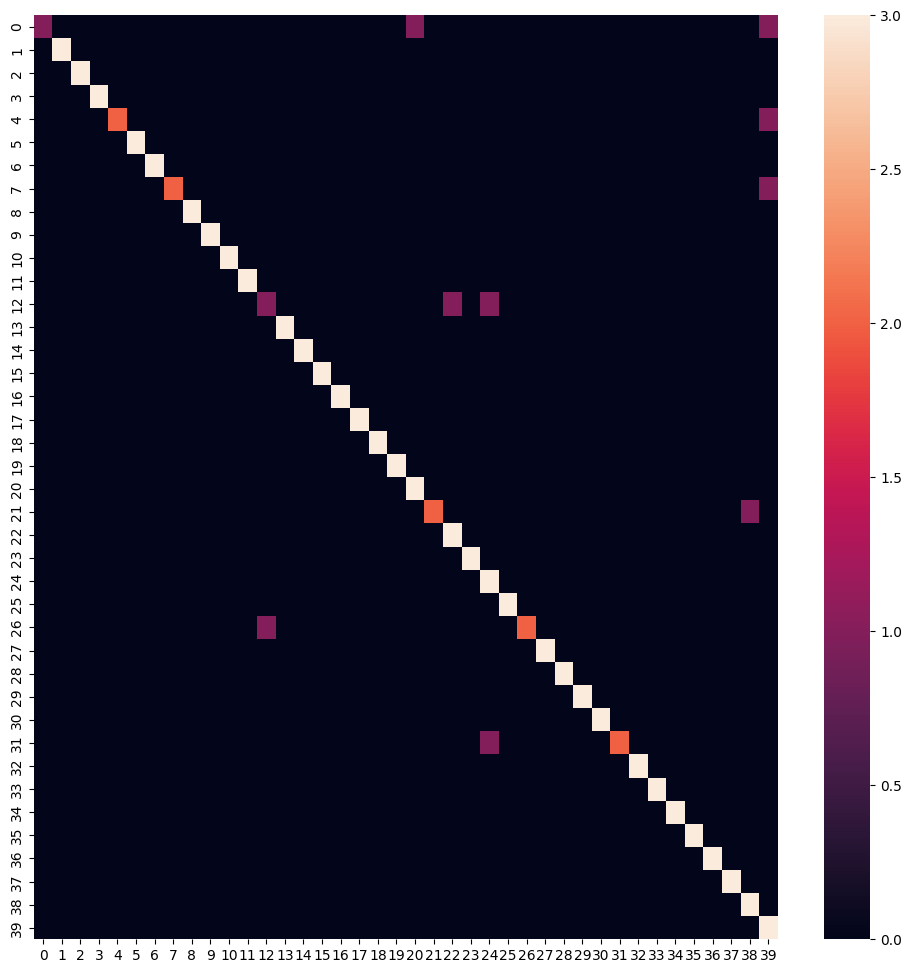

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__,
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.95


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__,
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.98


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr score:0.93


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X,
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [ ]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

In [ ]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

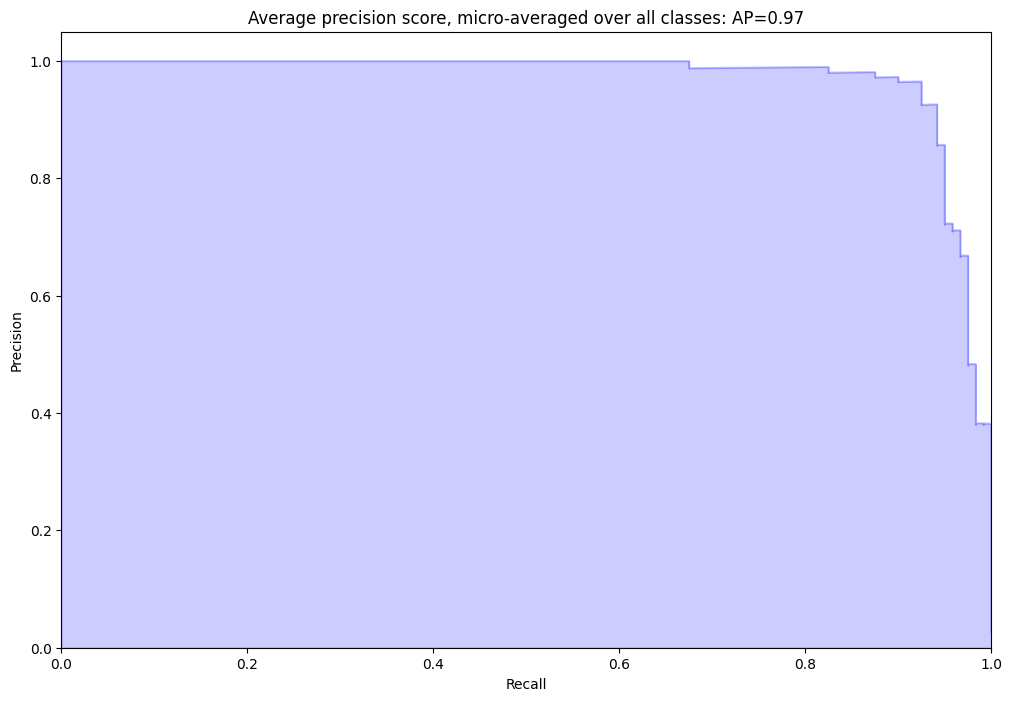

In [ ]:
from inspect import signature # Import signature from inspect instead

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# Get the number of unique classes in y_train
n_classes = len(np.unique(y_train))

# Calculate the maximum allowed n_components
max_components = min(X_train.shape[1], n_classes - 1)

# Set n_components to the maximum allowed if it's currently larger
n_components = min(n_components, max_components)

# Now create and fit the LDA model
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

In [ ]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)

In [ ]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    

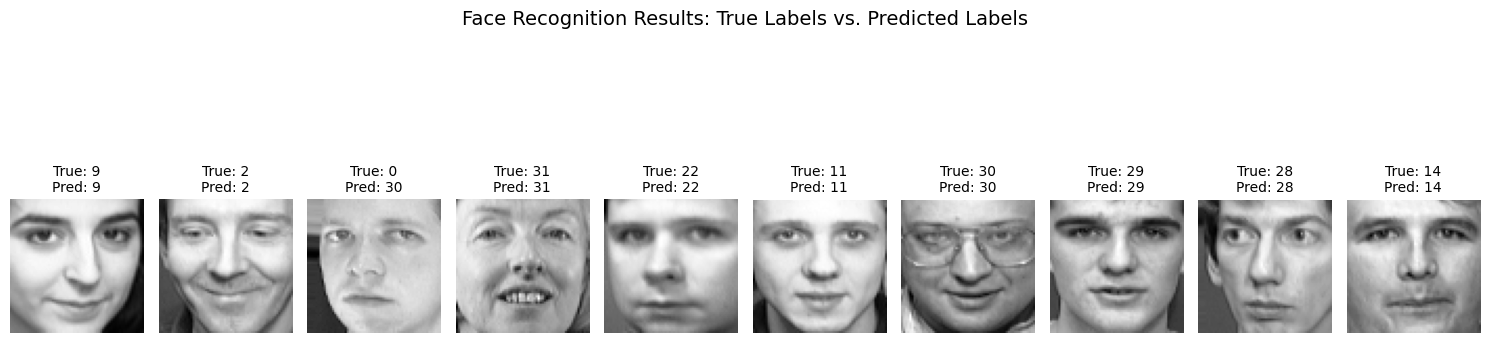

In [ ]:
def show_recognized_faces(X_test, y_test, y_pred, images, image_shape, n_faces=10):
    """
    Displays a subset of test faces along with their predicted labels and true labels.

    Args:
        X_test: Test dataset (flattened).
        y_test: True labels for the test dataset.
        y_pred: Predicted labels for the test dataset.
        images: Original dataset of images (not flattened).
        image_shape: Tuple of the shape of individual images (e.g., (64, 64)).
        n_faces: Number of faces to display (default=10).
    """
    # Select `n_faces` random indices from the test dataset
    indices = np.random.choice(range(len(X_test)), size=n_faces, replace=False)

    # Create the plot
    fig, axes = plt.subplots(1, n_faces, figsize=(15, 5))
    fig.suptitle("Face Recognition Results: True Labels vs. Predicted Labels", fontsize=14)

    for i, idx in enumerate(indices):
        # Reshape the flattened test image back to its original shape
        face_image = X_test[idx].reshape(image_shape)

        # Display the face image
        axes[i].imshow(face_image, cmap='gray')
        axes[i].axis('off')

        # Set the title with true and predicted labels
        axes[i].set_title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=10)

    plt.tight_layout()
    plt.show()


# Define parameters for the function
image_shape = (64, 64)  # Olivetti images are 64x64
n_faces_to_display = 10  # Number of faces to show in the plot

# Call the function with the model predictions
show_recognized_faces(X_test, y_test, y_pred, data, image_shape, n_faces=n_faces_to_display)


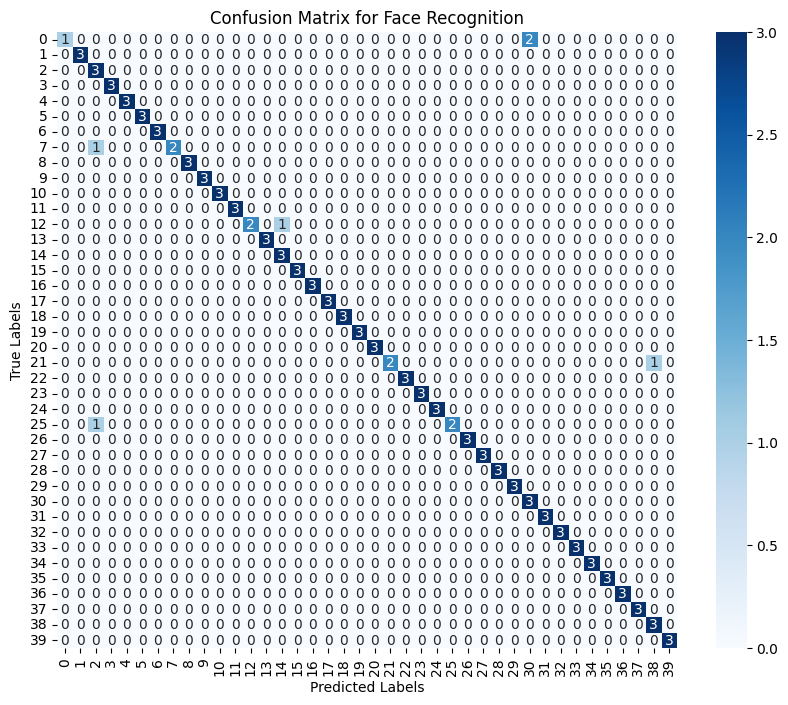

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title('Confusion Matrix for Face Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.0190 - loss: 3.7086 - val_accuracy: 0.0536 - val_loss: 3.6883
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.0202 - loss: 3.6730 - val_accuracy: 0.0714 - val_loss: 3.6826
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.0889 - loss: 3.6396 - val_accuracy: 0.0714 - val_loss: 3.6807
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.0882 - loss: 3.5310 - val_accuracy: 0.0893 - val_loss: 3.6158
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.1752 - loss: 3.4294 - val_accuracy: 0.0536 - val_loss: 3.5413
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.2886 - loss: 3.1773 - val_accuracy: 0.1250 - val_loss: 3.4075
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.3238 - loss: 2.8857 - val_accuracy: 0.2679 - val_loss: 3.1254
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.4395 - loss: 2.3853 - val_accuracy: 0.4286 - val_loss:

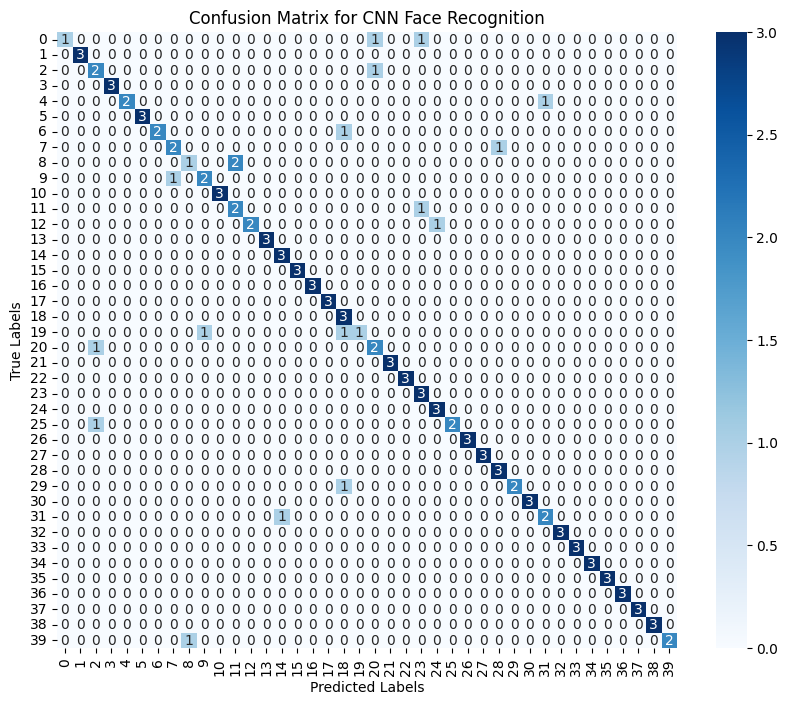

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encoding the labels if using categorical output
y_train_categorical = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_categorical = to_categorical(y_test, num_classes=len(np.unique(y_train)))

# Define image dimensions and channels
image_height, image_width = 64, 64  # Assuming Olivetti dataset (64x64)
num_channels = 1  # Assuming grayscale images

# Reshape the input data to match the expected shape by the CNN
X_train = X_train.reshape(-1, image_height, image_width, num_channels)
X_test = X_test.reshape(-1, image_height, image_width, num_channels)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred_categorical = model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for CNN Face Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

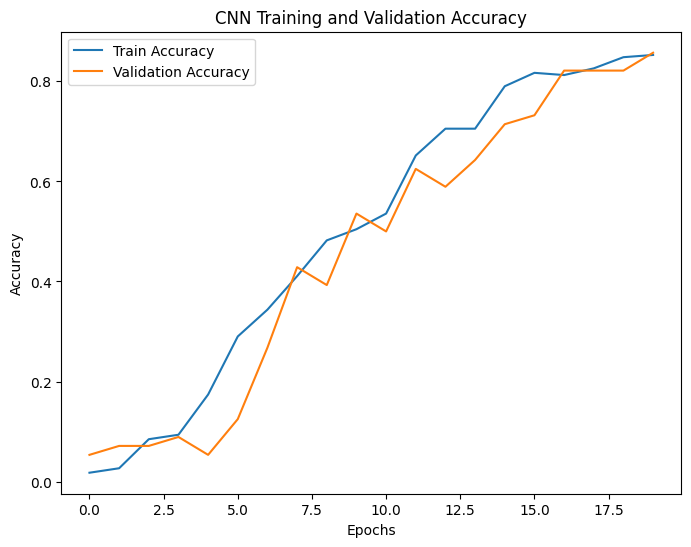

In [ ]:
# Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import Sequential

# Build the CNN model with Batch Normalization
model_batch_norm = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    BatchNormalization(),  # Correct import used
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])



In [ ]:
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization
)
from tensorflow.keras.models import Sequential

# Build the CNN model with Layer Normalization
model_layer_norm = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    LayerNormalization(),  # Correct import used
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    LayerNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    LayerNormalization(),

    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np

# Define Custom Instance Normalization Layer
class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):
        self.gamma = self.add_weight(
            shape=(1, 1, 1, input_shape[-1]),
            initializer="ones",
            trainable=True,
        )
        self.beta = self.add_weight(
            shape=(1, 1, 1, input_shape[-1]),
            initializer="zeros",
            trainable=True,
        )
        super(InstanceNormalization, self).build(input_shape)

    def call(self, inputs):
        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)
        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)
        return self.gamma * normalized + self.beta


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 583ms/step - accuracy: 0.8177 - loss: 0.5098 - val_accuracy: 0.8571 - val_loss: 0.8473
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.8264 - loss: 0.5430 - val_accuracy: 0.8571 - val_loss: 0.7901
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9494 - loss: 0.3278 - val_accuracy: 0.8750 - val_loss: 0.6549
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9122 - loss: 0.3448 - val_accuracy: 0.8571 - val_loss: 0.6194
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.8640 - loss: 0.3271 - val_accuracy: 0.8750 - val_loss: 0.6855
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.9227 - loss: 0.2857 - val_accuracy: 0.8393 - val_loss: 0.6418
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9116 - loss: 0.2549 - val_accuracy: 0.8929 - val_loss: 0.5899
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9353 - loss: 0.2600 - val_accuracy: 0.8750 - val_loss:

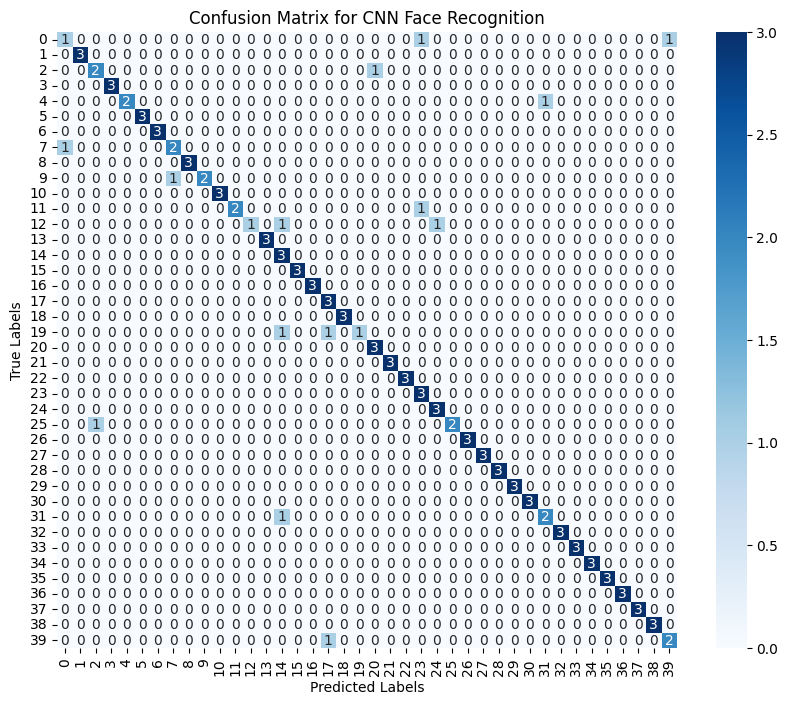

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred_categorical = model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for CNN Face Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()